# Image Watermarking

## 0. Initialization

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import torch
from watermark.auto_watermark import AutoWatermark
from utils.diffusion_config import DiffusionConfig
from diffusers import StableDiffusionPipeline
from diffusers import DPMSolverMultistepScheduler
from dotenv import load_dotenv

load_dotenv()

model_path = os.getenv("MODEL_PATH")

scheduler = DPMSolverMultistepScheduler.from_pretrained(model_path, subfolder="scheduler")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
pipe = StableDiffusionPipeline.from_pretrained(model_path, scheduler=scheduler).to(device)

diffusion_config = DiffusionConfig(
    scheduler = scheduler,
    pipe = pipe,
    device = device,
    image_size = (512, 512),
    num_inference_steps = 50,
    guidance_scale = 3.5,
    gen_seed = 42,
    inversion_type = "ddim"
)

/home/harry/miniconda3/envs/markdiffusion/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]


## 1. Tree-Ring Watermark

### 1.1. Tree-Ring Watermark Generation & Detection

100%|██████████| 50/50 [00:08<00:00,  5.64it/s]


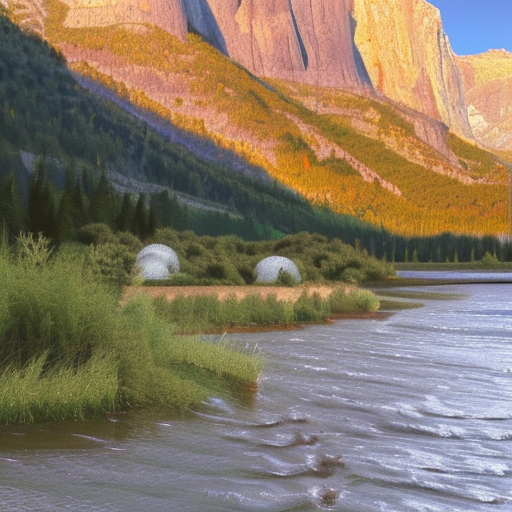

In [2]:
mywatermark = AutoWatermark.load('TR', algorithm_config=f'config/TR.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [3]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)


100%|██████████| 50/50 [00:08<00:00,  5.65it/s]

{'is_watermark': True, 'l1_distance': 10.59000015258789}


In [4]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

100%|██████████| 50/50 [00:08<00:00,  5.73it/s]

{'is_watermark': True, 'l1_distance': 20.734474182128906}


In [5]:
print(mywatermark.detect_watermark_in_media(watermarked_image, detector_type="p_value"))
print(mywatermark.detect_watermark_in_media(unwatermarked_image, detector_type="p_value"))

100%|██████████| 50/50 [00:08<00:00,  5.56it/s]


{'is_watermark': True, 'p_value': np.float64(0.5122506551625553)}


100%|██████████| 50/50 [00:08<00:00,  5.75it/s]

{'is_watermark': True, 'p_value': np.float64(0.5172596967895532)}


### 1.2. Tree-Ring Watermark Visualization

In [6]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('TR', data_for_visualization=data_for_visualization)

100%|██████████| 50/50 [00:08<00:00,  5.73it/s]


{'channel': 0}
{}
{'channel': 0}
{}


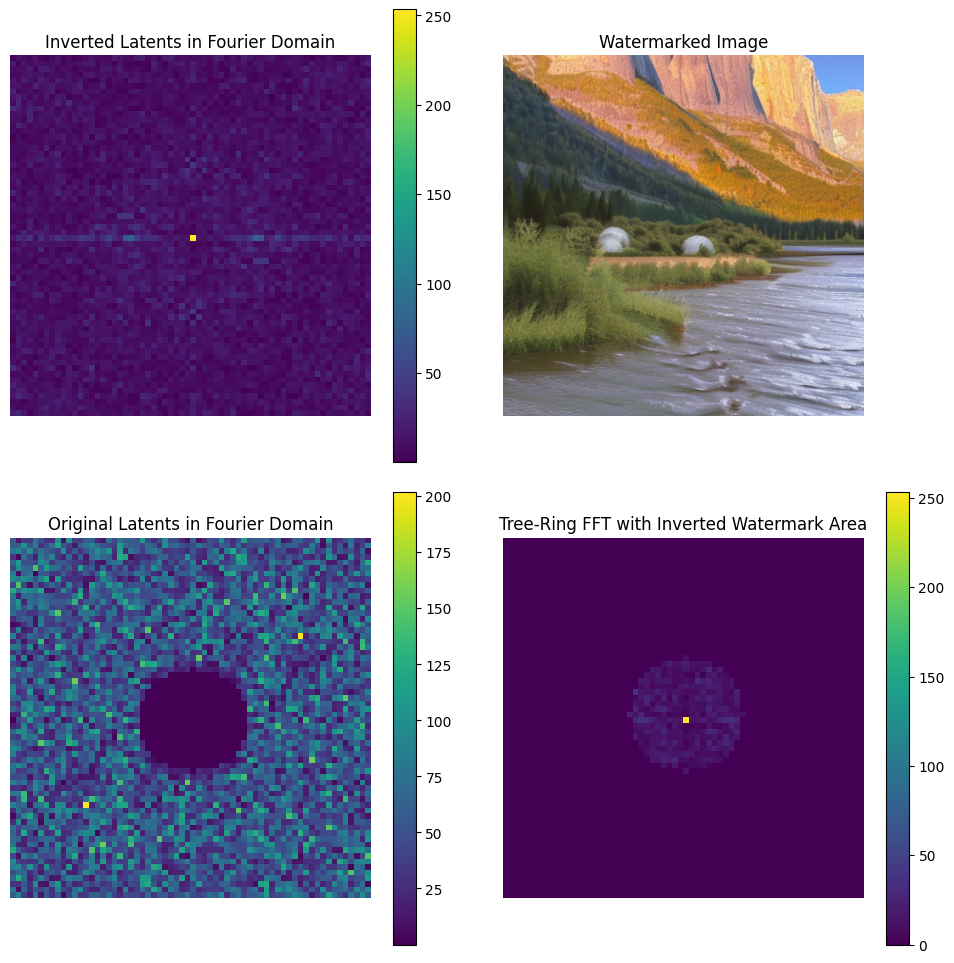

In [7]:
method_kwargs = [{"channel": 0}, {}, {"channel": 0}, {}]

fig = visualizer.visualize(
    rows=2, 
    cols=2, 
    methods=['draw_inverted_latents_fft', 'draw_watermarked_image', 'draw_orig_latents_fft', 'draw_inverted_pattern_fft'], 
    method_kwargs=method_kwargs, 
    save_path='TR_watermark_visualization.pdf'
    )

## 2. Gaussian-Shading Watermark

### 2.1. Gaussian-Shading Watermark Generation & Detection

100%|██████████| 50/50 [00:08<00:00,  5.59it/s]


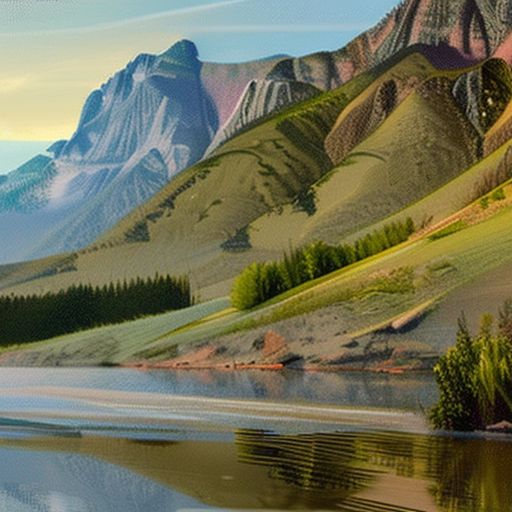

In [8]:
mywatermark = AutoWatermark.load('GS', algorithm_config=f'config/GS.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [9]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

100%|██████████| 50/50 [00:08<00:00,  5.65it/s]

{'is_watermark': True, 'bit_acc': 1.0}


In [10]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

100%|██████████| 50/50 [00:08<00:00,  5.71it/s]

{'is_watermark': False, 'bit_acc': 0.54296875}


### 2.2. Gaussian-Shading Watermark Visualization

In [11]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('GS', data_for_visualization=data_for_visualization)

100%|██████████| 50/50 [00:08<00:00,  5.56it/s]


{'channel': 0}
{}
{'channel': 0}
{'channel': 0}


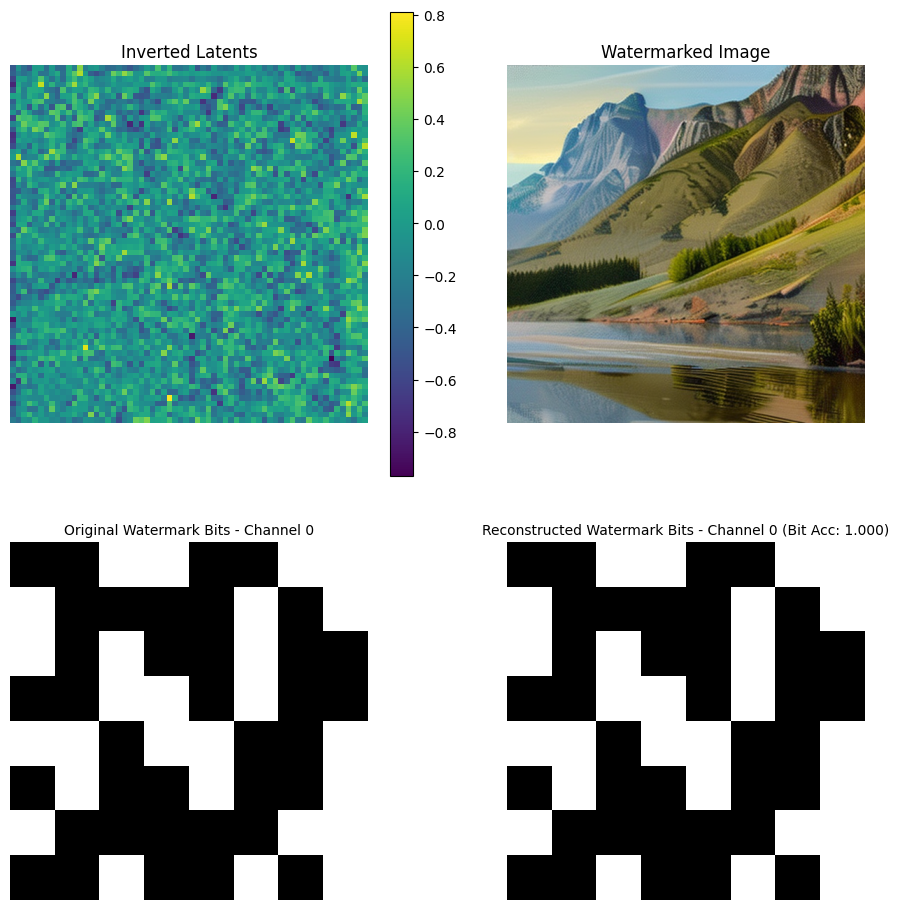

In [12]:
method_kwargs = [{"channel": 0}, {}, {"channel": 0}, {"channel": 0}]

fig = visualizer.visualize(
    rows=2, 
    cols=2, 
    methods=['draw_inverted_latents', 'draw_watermarked_image', 'draw_watermark_bits', 'draw_reconstructed_watermark_bits'], 
    method_kwargs=method_kwargs, 
    save_path='GS_watermark_visualization.pdf'
    )

## 3. PRC Watermark

### 3.1. PRC Watermark Generation & Detection 

100%|██████████| 50/50 [00:08<00:00,  5.78it/s]


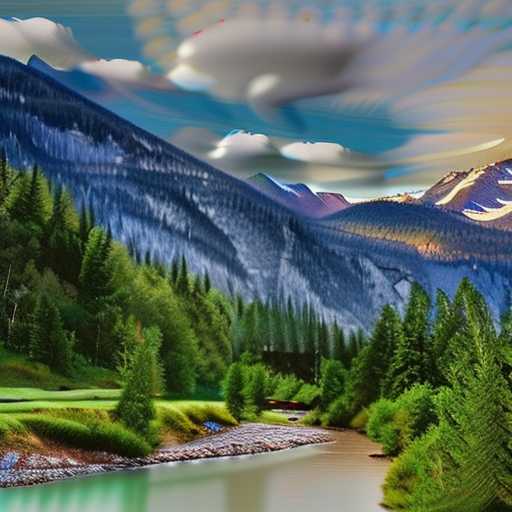

In [15]:
diffusion_config.inversion_type = "exact"
mywatermark = AutoWatermark.load('PRC', algorithm_config=f'config/PRC.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [16]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image, inv_order=1)
print(detection_result)

100%|██████████| 50/50 [01:49<00:00,  2.20s/it]
/home/harry/miniconda3/envs/markdiffusion/lib/python3.12/site-packages/ldpc/_legacy_ldpc_v1/_legacy_bp_decoder.py:46: UserWarning: This is the old syntax for the `bp_decoder` from `ldpc v1`. Use the `BpDecoder` class from `ldpc v2` for additional features.
  warnings.warn(


threshold: -11190.905024916581
detection_result: True, decoding_result: [0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1
 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1], combined_result: True
{'is_watermark': True, 'score': np.float64(-11019.743591979488), 'decoding_result': array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=uint8), 'decoded_message': 'Hello, World!'}


In [17]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

100%|██████████| 50/50 [00:08<00:00,  5.83it/s]
/home/harry/miniconda3/envs/markdiffusion/lib/python3.12/site-packages/diffusers/configuration_utils.py:141: FutureWarning: Accessing config attribute `solver_order` directly via 'DPMSolverMultistepInverseScheduler' object attribute is deprecated. Please access 'solver_order' over 'DPMSolverMultistepInverseScheduler's config object instead, e.g. 'scheduler.config.solver_order'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
100%|██████████| 50/50 [06:03<00:00,  7.27s/it]


threshold: -11190.150204534772
{'is_watermark': False, 'score': np.float64(-11217.217827748369), 'decoding_result': None, 'decoded_message': None}


### 3.2. PRC Watermark Visualization

In [18]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('PRC', data_for_visualization=data_for_visualization)

100%|██████████| 50/50 [09:24<00:00, 11.28s/it]
/home/harry/workspace/MarkDiffusion/watermark/prc/prc.py:385: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prc_codeword=torch.tensor(prc_codeword, dtype=torch.float32),
/home/harry/workspace/MarkDiffusion/watermark/prc/prc.py:386: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pseudogaussian_noise=torch.tensor(pseudogaussian_noise, dtype=torch.float32),


{'channel': 3}
{}
{}
{}


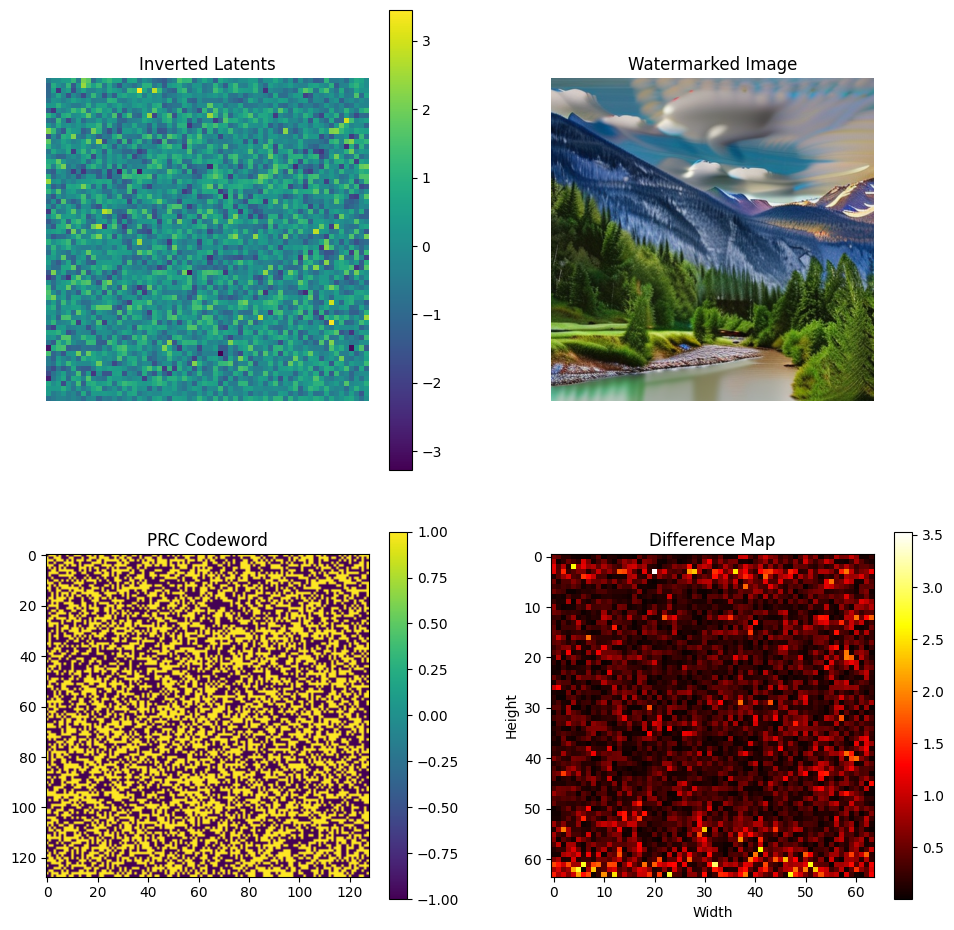

In [19]:
method_kwargs = [{"channel": 3}, {}, {}, {}]

fig = visualizer.visualize(
  rows=2,
  cols=2, 
  methods=['draw_inverted_latents', 'draw_watermarked_image', 'draw_codeword', 'draw_difference_map'], 
  method_kwargs=method_kwargs, 
  save_path='PRC_watermark_visualization.pdf'
)

## 4. RingID Watermark

### 4.1. RingID Watermark Generation & Detection

10


100%|██████████| 50/50 [00:09<00:00,  5.37it/s]


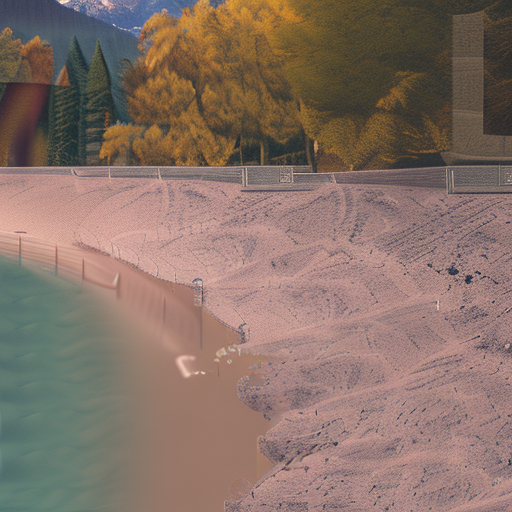

In [23]:
diffusion_config.inversion_type = "ddim"
mywatermark = AutoWatermark.load('RI', algorithm_config=f'config/RI.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [24]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

100%|██████████| 50/50 [00:09<00:00,  5.28it/s]

{'is_watermark': True, 'l1_distance': 37.60269671122023}


In [25]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

100%|██████████| 50/50 [00:08<00:00,  5.57it/s]

{'is_watermark': True, 'l1_distance': 48.57560290710835}


### 4.2. RingID Watermark Visualization

In [26]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('RI', data_for_visualization=data_for_visualization)

100%|██████████| 50/50 [00:09<00:00,  5.34it/s]


{'channel': 3}
{}
{}
{}


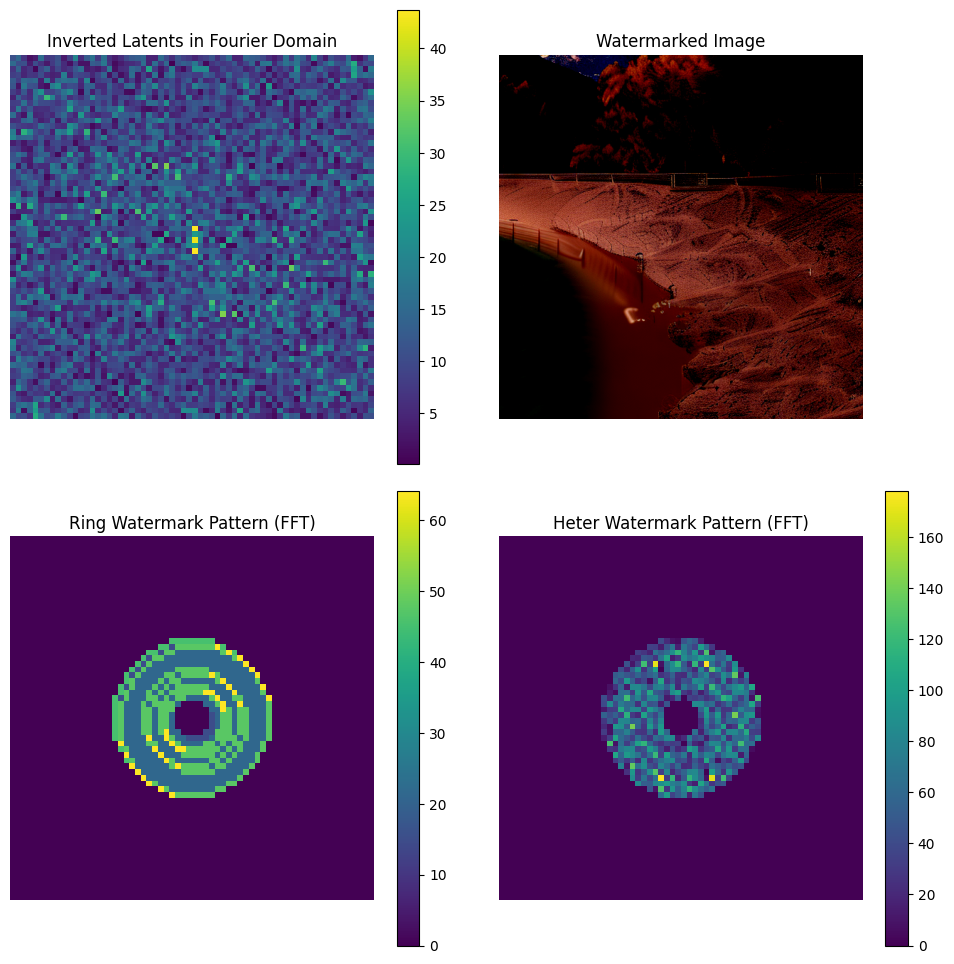

In [27]:
method_kwargs = [{"channel": 3}, {}, {}, {}]

fig = visualizer.visualize(
  rows=2, 
  cols=2, 
  methods=['draw_inverted_latents_fft', 'draw_watermarked_image', 'draw_ring_pattern_fft', 'draw_heter_pattern_fft'], 
  method_kwargs=method_kwargs, 
  save_path='RI_watermark_visualization.pdf'
)

## 5. SEAL: Semantic Aware Image Watermark

### 5.1. SEAL Watermark Generation & Detection

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
100%|██████████| 50/50 [00:06<00:00,  7.30it/s]


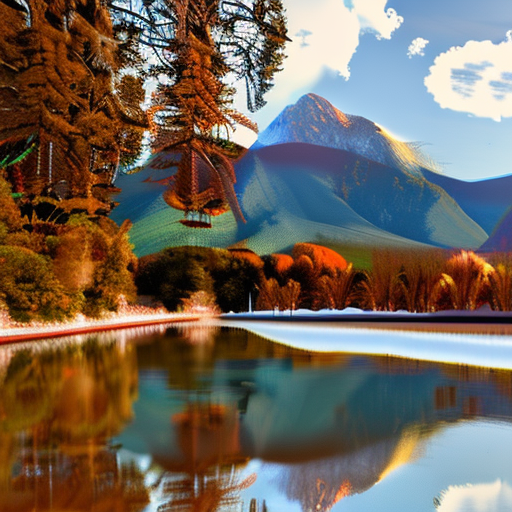

In [2]:
mywatermark = AutoWatermark.load('SEAL', algorithm_config=f'config/SEAL.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [3]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

100%|██████████| 50/50 [08:17<00:00,  9.95s/it]


{'is_watermarked': True, 'patch_accuracy': 0.0986328125}


In [4]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

100%|██████████| 50/50 [11:03<00:00, 13.28s/it]


{'is_watermarked': True, 'patch_accuracy': 0.0625}


### 5.2. SEAL Watermark Visualization

In [4]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image, prompt='')

visualizer = AutoVisualizer.load('SEAL', data_for_visualization=data_for_visualization)

100%|██████████| 50/50 [03:53<00:00,  4.66s/it]


{'channel': 2}
{}
{'show_number': True}
{}


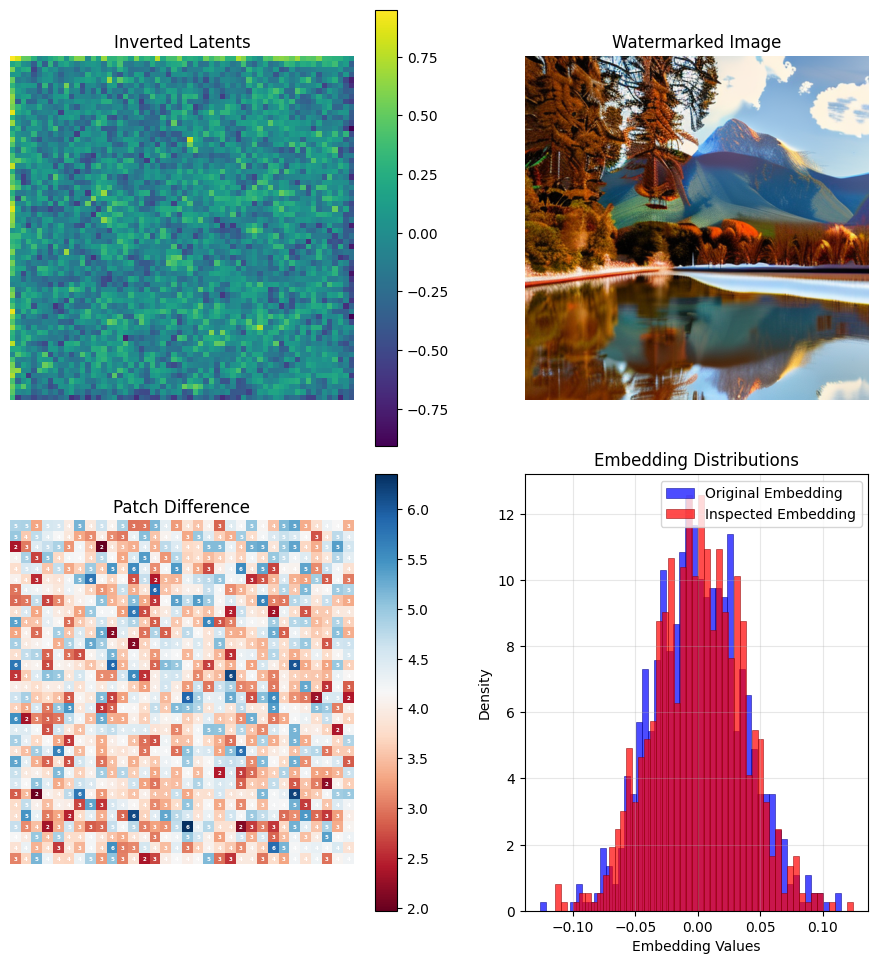

In [6]:
method_kwargs = [{"channel": 2}, {}, {"show_number": True}, {}]

fig = visualizer.visualize(
  rows=2,
  cols=2, 
  methods=['draw_inverted_latents', 'draw_watermarked_image', 'draw_patch_diff', 'draw_embedding_distributions'], 
  method_kwargs=method_kwargs,
  save_path='SEAL_watermark_visualization.pdf'
)

## 6. WIND: Two-Stage Robust Watermarking for Images

### 6.1. WIND Watermark Generation & Detection

/home/harry/miniconda3/envs/markdiffusion/lib/python3.12/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 50/50 [00:08<00:00,  5.64it/s]


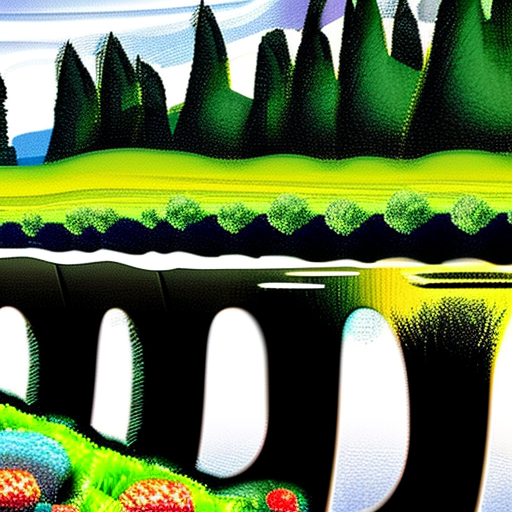

In [3]:
mywatermark = AutoWatermark.load('WIND', algorithm_config=f'config/WIND.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [4]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

100%|██████████| 50/50 [00:09<00:00,  5.30it/s]


{'group_id': 0, 'cosine_similarity': 0.5456100702285767, 'is_watermarked': True}


In [5]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

100%|██████████| 50/50 [00:09<00:00,  5.25it/s]


{'group_id': 0, 'cosine_similarity': 0.015188479796051979, 'is_watermarked': False}


### 6.2. WIND Watermark Visualization

In [6]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('WIND', data_for_visualization=data_for_visualization)

100%|██████████| 50/50 [00:09<00:00,  5.06it/s]


{'channel': 2}
{}
{'channel': 2}
{'channel': 2}


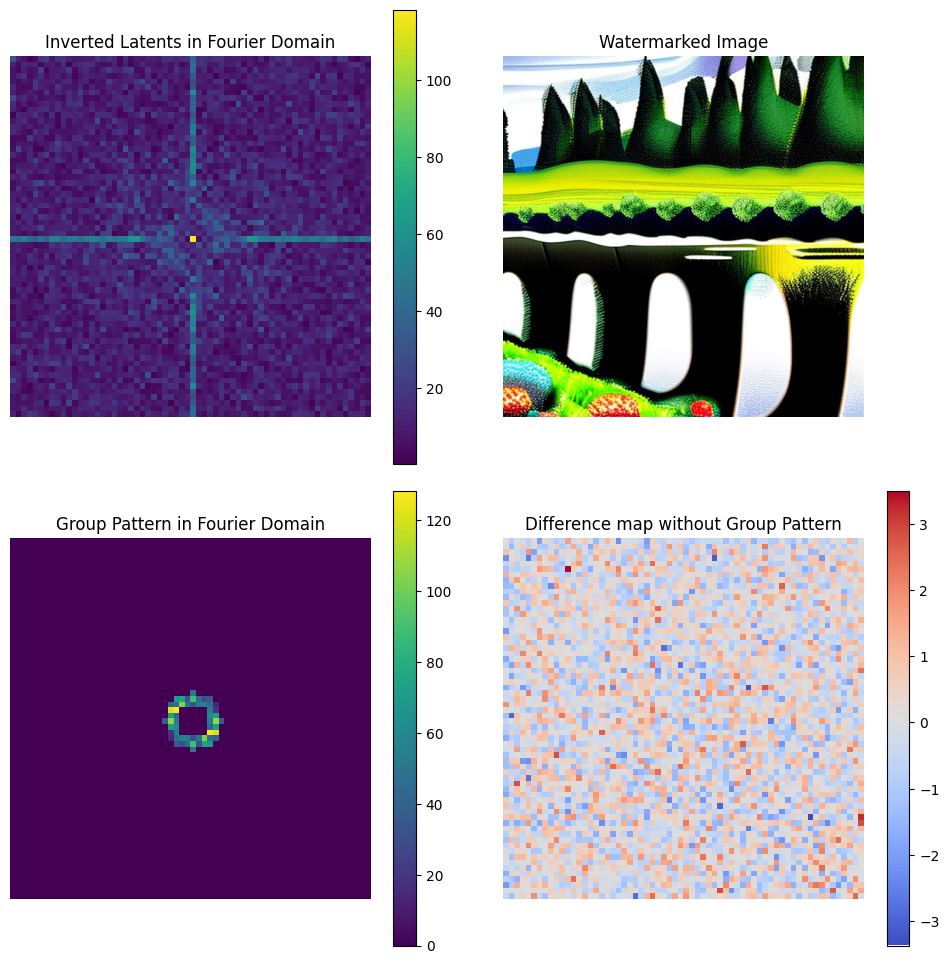

In [7]:
method_kwargs = [{"channel": 2}, {}, {"channel": 2}, {"channel": 2}]

fig = visualizer.visualize(
  rows=2, 
  cols=2,
  methods=['draw_inverted_latents_fft', 'draw_watermarked_image', 'draw_group_pattern_fft', 'draw_diff_noise_wo_group_pattern'], 
  method_kwargs=method_kwargs, 
  save_path='WIND_watermark_visualization.pdf'
)

## 7. ROBIN: Robust and Invisible Watermarks for Diffusion Models with Adversarial Optimization

### 7.1. ROBIN WaterMark Generation & Detection

Loading checkpoint from watermark/robin/ckpts/optimized_wm5-30_embedding-step-2000.pt


/home/harry/miniconda3/envs/markdiffusion/lib/python3.12/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:313: FutureWarning: `_encode_prompt()` is deprecated and it will be removed in a future version. Use `encode_prompt()` instead. Also, be aware that the output format changed from a concatenated tensor to a tuple.
  deprecate("_encode_prompt()", "1.0.0", deprecation_message, standard_warn=False)
/home/harry/workspace/MarkDiffusion/watermark/robin/watermark_generator.py:542: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  num_channels_latents = pipe.unet.in_channels
100%|██████████| 50/50 [00:10<00:00,  4.62it/s]
/home/harry/miniconda3/envs/markdiffusion/lib/python3.12/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:599: FutureWarning:

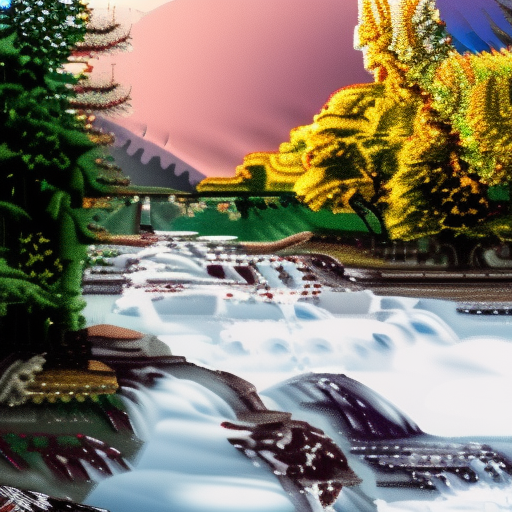

In [2]:
mywatermark = AutoWatermark.load('ROBIN', algorithm_config=f'config/ROBIN.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains", guidance_scale=7.5)

# visualize the watermarked image
watermarked_image.show()

In [3]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

100%|██████████| 50/50 [00:09<00:00,  5.23it/s]

l1_distance: 33.27083206176758
{'is_watermark': True, 'l1_distance': 33.27083206176758}


In [4]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

100%|██████████| 50/50 [00:08<00:00,  5.56it/s]

l1_distance: 49.29243469238281
{'is_watermark': False, 'l1_distance': 49.29243469238281}


### 7.2. ROBIN WaterMark Visualization

In [5]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('ROBIN', data_for_visualization=data_for_visualization)

/home/harry/miniconda3/envs/markdiffusion/lib/python3.12/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:313: FutureWarning: `_encode_prompt()` is deprecated and it will be removed in a future version. Use `encode_prompt()` instead. Also, be aware that the output format changed from a concatenated tensor to a tuple.
  deprecate("_encode_prompt()", "1.0.0", deprecation_message, standard_warn=False)
/home/harry/workspace/MarkDiffusion/watermark/robin/watermark_generator.py:542: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  num_channels_latents = pipe.unet.in_channels
100%|██████████| 50/50 [00:10<00:00,  4.84it/s]
/home/harry/miniconda3/envs/markdiffusion/lib/python3.12/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:599: FutureWarning:

{'channel': 3}
{}
{}
{}


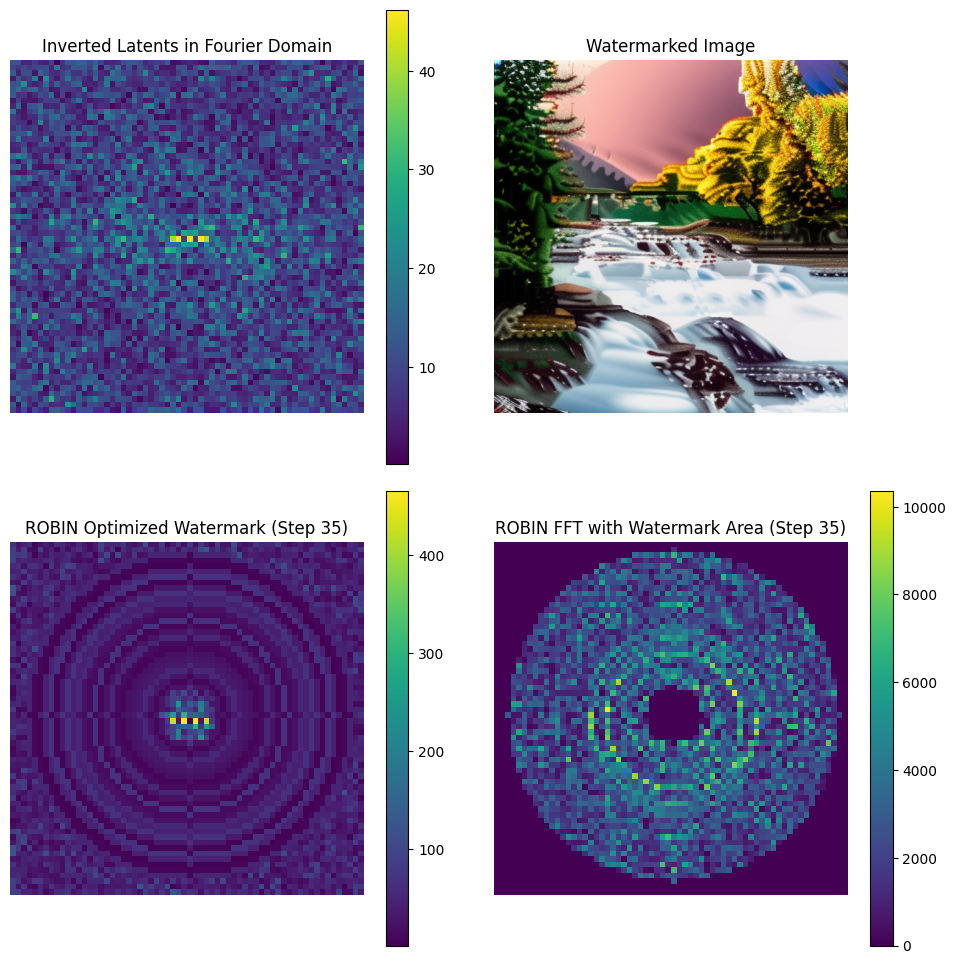

In [6]:
method_kwargs = [{"channel": 3}, {}, {}, {}]

fig = visualizer.visualize(
  rows=2, 
  cols=2, 
  methods=['draw_inverted_latents_fft', 'draw_watermarked_image', 'draw_optimized_watermark', 'draw_pattern_fft'], 
  method_kwargs=method_kwargs, 
  save_path='ROBIN_watermark_visualization.pdf'
)

# Video Watermarking

## 0. Initialization

In [2]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '2'

import torch
from watermark.auto_watermark import AutoWatermark
from utils.diffusion_config import DiffusionConfig
from diffusers import TextToVideoSDPipeline, StableVideoDiffusionPipeline
from diffusers import DPMSolverMultistepScheduler, DDIMInverseScheduler, DDIMScheduler
from dotenv import load_dotenv
load_dotenv()

model_path = os.getenv('T2V_MODEL_PATH')

scheduler = DDIMScheduler.from_pretrained(model_path, subfolder="scheduler")
device = 'cuda' if torch.cuda.is_available() else 'cpu'

pipe = TextToVideoSDPipeline.from_pretrained(
    model_path, 
    scheduler=scheduler,
    torch_dtype=torch.float16 if device == 'cuda' else torch.float32
).to(device)
diffusion_config = DiffusionConfig(
    pipe = pipe,
    scheduler = scheduler,
    device = device,
    image_size = (256, 256),        
    num_inference_steps = 25,       
    guidance_scale = 7.5,           
    gen_seed = 42,                  # 生成种子
    init_latents_seed= 36,         # 潜在变量种子
    num_frames = 16,                # 视频帧数（适中值便于测试）
    inversion_type = "ddim"         
)

/home/guansheng/miniconda3/envs/markdiffusion/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'cv2'

In [6]:
import matplotlib.pyplot as plt
def display_frame(frame, title="Generated Frame"):
    """在 Jupyter Notebook 中显示图像帧"""
    plt.figure(figsize=(8, 8))
    plt.imshow(frame)
    plt.axis('off')
    plt.title(title)
    plt.show()

## 1. VideoShield Watermark

### 1.1 VideoShield Watermark Generation & Detection

100%|██████████| 25/25 [00:10<00:00,  2.39it/s]


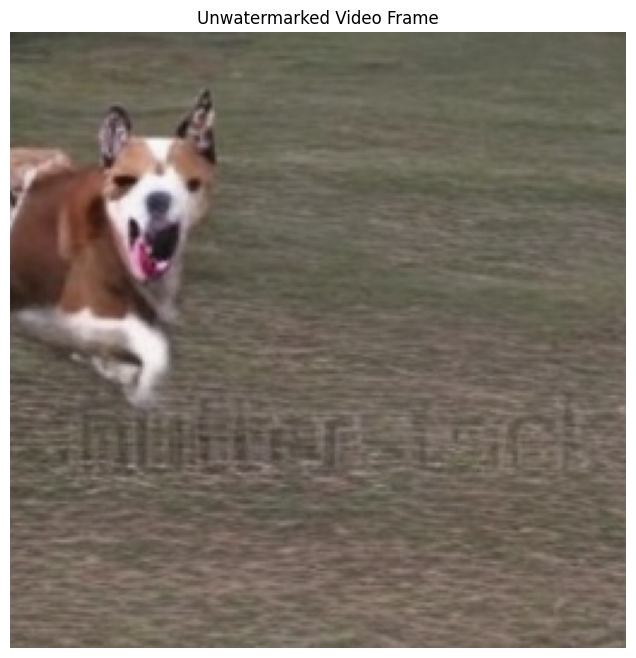

100%|██████████| 25/25 [00:11<00:00,  2.25it/s]


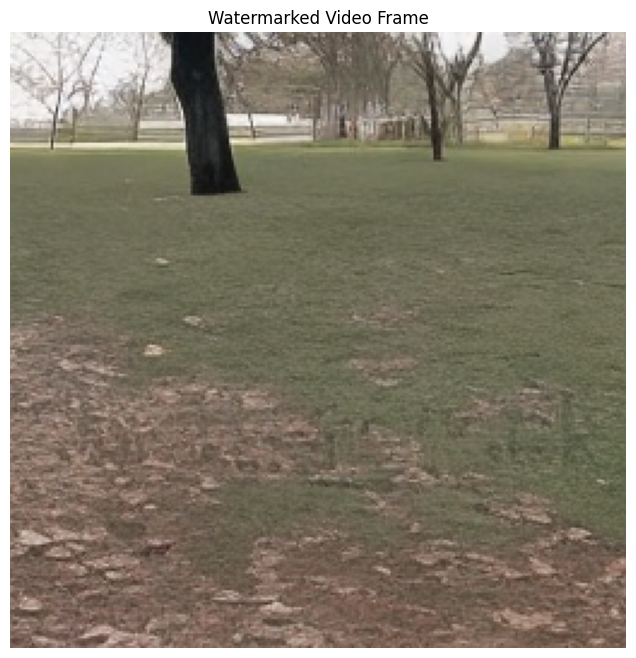

In [7]:
mywatermark = AutoWatermark.load('VideoShield', algorithm_config=f'config/VideoShield.json', diffusion_config=diffusion_config)

unwatermarked_video = mywatermark.generate_unwatermarked_media(input_data="a dog running in the park")
display_frame(unwatermarked_video[0], "Unwatermarked Video Frame")

watermarked_video = mywatermark.generate_watermarked_media(input_data="a dog running in the park", num_frames=16)
display_frame(watermarked_video[0], "Watermarked Video Frame")


In [8]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_video, detector_type='bit_acc')
print("带水印视频检测结果:", detection_result)
    
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_video, detector_type='bit_acc')
print("无水印视频检测结果:", detection_result)

The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
100%|██████████| 25/25 [00:11<00:00,  2.25it/s]
The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


带水印视频检测结果: {'is_watermarked': True, 'bit_acc': 1.0}


100%|██████████| 25/25 [00:11<00:00,  2.27it/s]

无水印视频检测结果: {'is_watermarked': False, 'bit_acc': 0.470703125}


### 1.2. VideoShield Watermark Visualization

In [9]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(
    video_frames=watermarked_video,
    prompt="",
    guidance_scale=1.0,
    num_inference_steps=25,
)
visualizer = AutoVisualizer.load('VideoShield', data_for_visualization=data_for_visualization)

The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
100%|██████████| 25/25 [00:10<00:00,  2.29it/s]


{}
{}
{}
{}


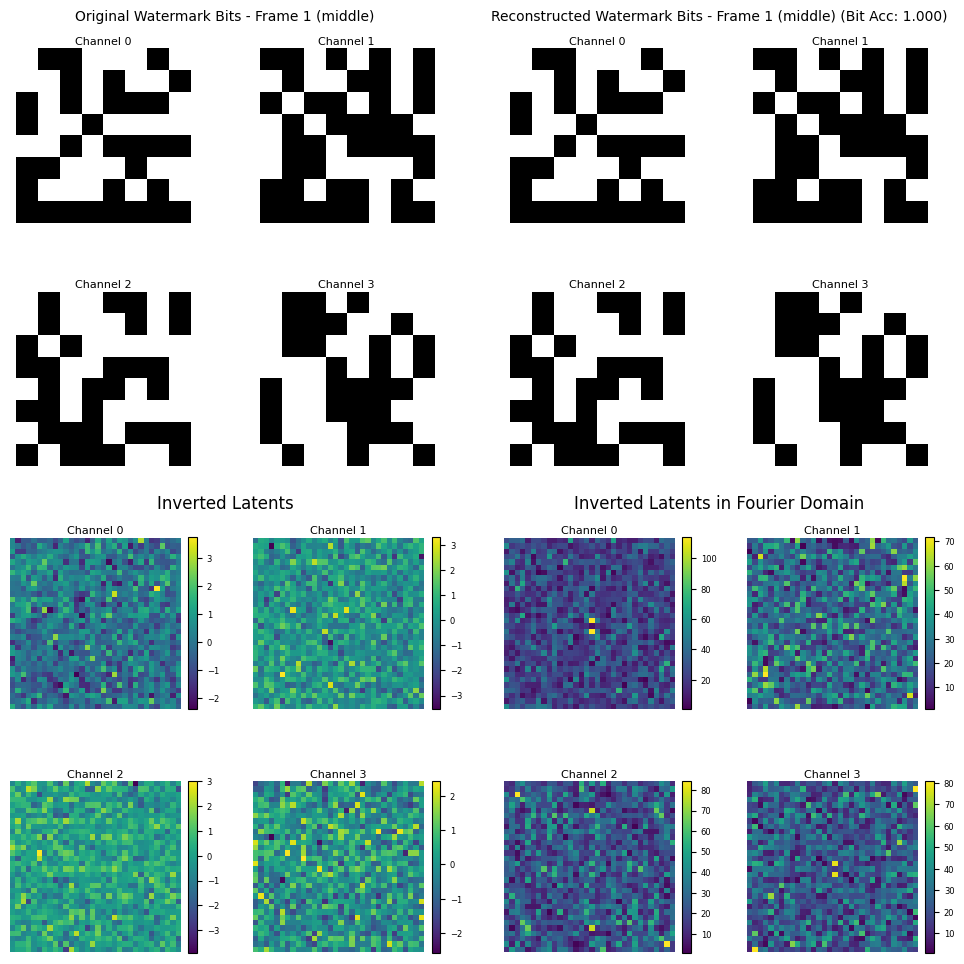

In [10]:
fig = visualizer.visualize(rows=2, cols=2, methods=['draw_watermark_bits', 'draw_reconstructed_watermark_bits', 'draw_inverted_latents', 'draw_inverted_latents_fft']);